# Analisis exploratorio de las ventas 

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Archivo

In [3]:
ventas= pd.read_csv("detalle_de_venta.csv",delimiter=',', encoding='utf-8')

In [4]:
ventas.head(5)

Dia Fecha de operacion    Hora de cierre  Semana  Movimiento PDV  Orden  \
0  lunes         06/11/2023  07/11/2023 08:50      45               1      1   
1  lunes         06/11/2023  07/11/2023 09:00      45               2      2   
2  lunes         06/11/2023  07/11/2023 09:00      45               2      2   
3  lunes         06/11/2023  07/11/2023 09:00      45               2      2   
4  lunes         06/11/2023  07/11/2023 09:00      45               2      2   

  Tipo de orden Subtipo de orden  No. Mesa  No. Personas  ... Modificador  \
0    Restaurant                -      75.0             9  ...         NaN   
1    Restaurant                -      16.0             3  ...         NaN   
2    Restaurant                -      16.0             3  ...      VERDES   
3    Restaurant                -      16.0             3  ...         NaN   
4    Restaurant                -      16.0             3  ...         NaN   

  Clave platillo Codigo de barras  ¿Es modificador?   Hora de captura  \
0         DES006              NaN                No  06/11/2023 13:37   
1         DES001              NaN                No  07/11/2023 08:50   
2          MD001              NaN                Si  07/11/2023 08:50   
3         DES003              NaN                No  07/11/2023 08:50   
4         DES005              NaN                No  07/11/2023 08:50   

  Terminal de captura   Subtotal .1  IVA .1   IEPS .1   Total .1  
0     DESKTOP-INESN18       $133.62  $21.38     $-       $155.00  
1     DESKTOP-INESN18       $133.62  $21.38     $-       $155.00  
2     DESKTOP-INESN18         $-      $-        $-         $-     
3     DESKTOP-INESN18       $142.24  $22.76     $-       $165.00  
4     DESKTOP-INESN18        $68.97  $11.03     $-        $80.00  

[5 rows x 38 columns]

In [5]:
ventas.tail()

Dia Fecha de operacion    Hora de cierre  Semana  Movimiento PDV  \
7573  domingo         31/12/2023  31/12/2023 19:09      52            1282   
7574  domingo         31/12/2023  31/12/2023 19:09      52            1282   
7575  domingo         31/12/2023  31/12/2023 19:09      52            1282   
7576  domingo         31/12/2023  31/12/2023 19:09      52            1282   
7577  domingo         31/12/2023  31/12/2023 19:09      52            1282   

      Orden Tipo de orden Subtipo de orden  No. Mesa  No. Personas  ...  \
7573     69    Restaurant                -       1.0             2  ...   
7574     69    Restaurant                -       1.0             2  ...   
7575     69    Restaurant                -       1.0             2  ...   
7576     69    Restaurant                -       1.0             2  ...   
7577     69    Restaurant                -       1.0             2  ...   

     Modificador Clave platillo Codigo de barras  ¿Es modificador?  \
7573      RIBEYE          MD065              NaN                Si   
7574      PARA 2          MD066              NaN                Si   
7575         NaN         BEB016              NaN                No   
7576         NaN         BEB016              NaN                No   
7577         NaN          palom              NaN                No   

       Hora de captura Terminal de captura   Subtotal .1  IVA .1   IEPS .1  \
7573  31/12/2023 18:05     DESKTOP-4BPBQ1L         $-      $-        $-      
7574  31/12/2023 18:05     DESKTOP-4BPBQ1L         $-      $-        $-      
7575  31/12/2023 18:14     DESKTOP-INESN18        $86.21  $13.79     $-      
7576  31/12/2023 19:04     DESKTOP-L07312H        $86.21  $13.79     $-      
7577  31/12/2023 19:04     DESKTOP-L07312H        $43.10   $6.90     $-      

       Total .1  
7573      $-     
7574      $-     
7575    $100.00  
7576    $100.00  
7577     $50.00  

[5 rows x 38 columns]

In [6]:
ventas.describe()

Semana  Movimiento PDV        Orden     No. Mesa  No. Personas  \
count  7578.000000     7578.000000  7578.000000  7456.000000   7578.000000   
mean     51.081684      649.436527    40.860781    40.062098      3.963579   
std       0.907962      372.763787    24.294903   292.632718      2.967466   
min      45.000000        1.000000     1.000000     1.000000      1.000000   
25%      51.000000      321.000000    22.000000     7.000000      2.000000   
50%      51.000000      671.000000    40.000000    12.000000      3.000000   
75%      52.000000      969.000000    58.000000    19.000000      5.000000   
max      52.000000     1282.000000   109.000000  9877.000000     30.000000   

         Subtotal        Total      Cantidad  Precio unitario  \
count  7445.000000  7445.000000  7578.000000      7445.000000   
mean    879.973683  1020.770316     1.148192       114.530490   
std     719.026579   834.070877     0.554366       145.211264   
min      12.930000    15.000000     1.000000         0.000000   
25%     439.660000   510.000000     1.000000        30.000000   
50%     663.790000   770.000000     1.000000        50.000000   
75%    1081.900000  1255.000000     1.000000       155.000000   
max    7323.280000  8495.000000    11.000000      1700.000000   

       Codigo de barras  
count               0.0  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [7]:
# nombre de las columnas 
ventas.columns

Index(['Dia', 'Fecha de operacion', 'Hora de cierre', 'Semana',
       'Movimiento PDV', 'Orden', 'Tipo de orden', 'Subtipo de orden',
       'No. Mesa', 'No. Personas', 'Mesero', 'Terminal', 'Accion',
       ' Subtotal ', ' IVA ', ' IEPS ', ' Total ', ' Descuento ', 'Cantidad',
       'Precio unitario', ' Precio unitario con modificador ', ' Costo real ',
       ' Costo con modificadores ', ' Costo ideal ', 'Tipo de grupo', 'Grupo',
       'Descripcion', 'Platillo - Articulo', 'Modificador', 'Clave platillo',
       'Codigo de barras', '¿Es modificador?', 'Hora de captura',
       'Terminal de captura', ' Subtotal .1', ' IVA .1', ' IEPS .1',
       ' Total .1'],
      dtype='object')

## Días x la semana

In [8]:
ventas.rename(columns={' Total ': 'Total'}, inplace=True)

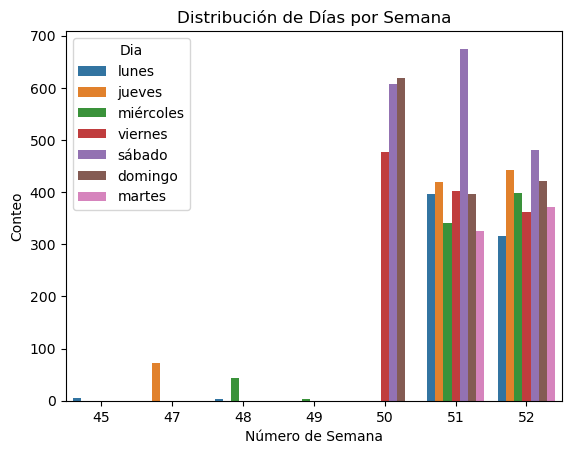

In [9]:
sns.countplot(x='Semana', hue='Dia', data=ventas)
plt.title('Distribución de Días por Semana')
plt.xlabel('Número de Semana')
plt.ylabel('Conteo')
plt.show()

## total x la semana

In [10]:
resultados = ventas.groupby(['Semana', 'Dia'])['Total'].sum().reset_index()

In [11]:
total_suma = ventas['Total'].sum()
print(total_suma)

7599635.0


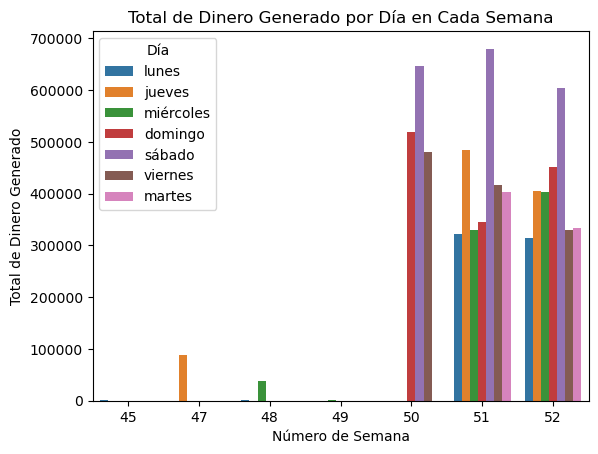

In [12]:
# Crear un gráfico de barras utilizando seaborn
sns.barplot(x='Semana', y='Total', hue='Dia', data=resultados)
plt.legend(title='Día', loc='upper left')
plt.title('Total de Dinero Generado por Día en Cada Semana')
plt.xlabel('Número de Semana')
plt.ylabel('Total de Dinero Generado')
plt.show()

## grupo de comida x dia de la semana

In [13]:
ventas.rename(columns={'Platillo - Articulo': 'Platillo'}, inplace=True)

In [14]:
relacion_platillo_dia = ventas.groupby(['Dia', 'Grupo']).size().reset_index(name='Frecuencia' )

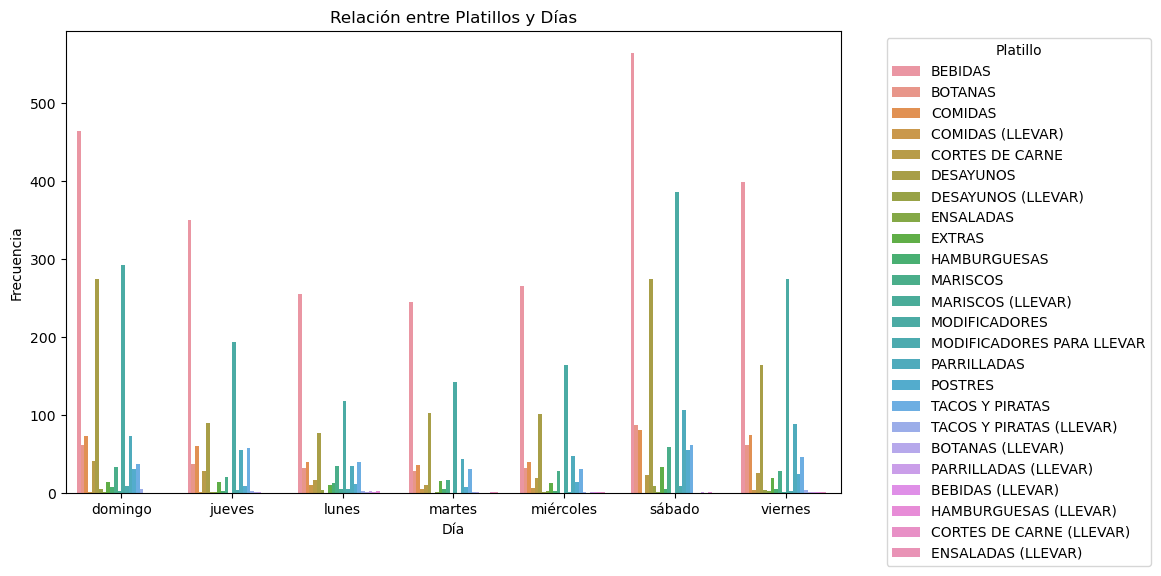

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dia', y='Frecuencia', hue='Grupo', data=relacion_platillo_dia)
plt.title('Relación entre Platillos y Días')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.legend(title='Platillo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Mesero


In [16]:
# Agrupar por mesero y contar el número de órdenes únicas (excluyendo pruebasd)
rendimiento_meseros = ventas.groupby('Mesero')['Orden'].nunique()
rendimiento_meseros = rendimiento_meseros.drop('Pruebas')

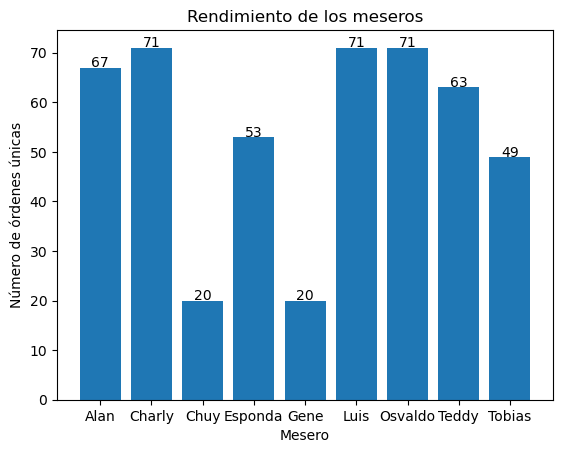

In [17]:
# Crear el gráfico de barras
plt.bar(rendimiento_meseros.index, rendimiento_meseros.values)
# Agregar números exactos sobre las barras
for i, valor in enumerate(rendimiento_meseros.values):
    plt.text(i, valor + 0.1, str(valor), ha='center')
# Agregar etiquetas y título
plt.xlabel('Mesero')
plt.ylabel('Número de órdenes únicas')
plt.title('Rendimiento de los meseros')
# Mostrar el gráfico
plt.show()

## Rentabilidad

In [18]:
ventas_por_platillo = ventas.groupby('Platillo')['Total'].sum().reset_index()

In [19]:
ventas_por_platillo['dieciseis_por_ciento'] = ventas_por_platillo['Total'] * 0.16

ventas_por_platillo.head()

Platillo   Total  dieciseis_por_ciento
0               1/2 Veneno   1170.0                 187.2
1      1/2 Charros (LLEVAR)  1205.0                 192.8
2    1KG ARRACHERA (LLEVAR)  6420.0                1027.2
3  1KG CARNE ASADA (LLEVAR)  2040.0                 326.4
4           2 LIMONES EXTRA     0.0                   0.0

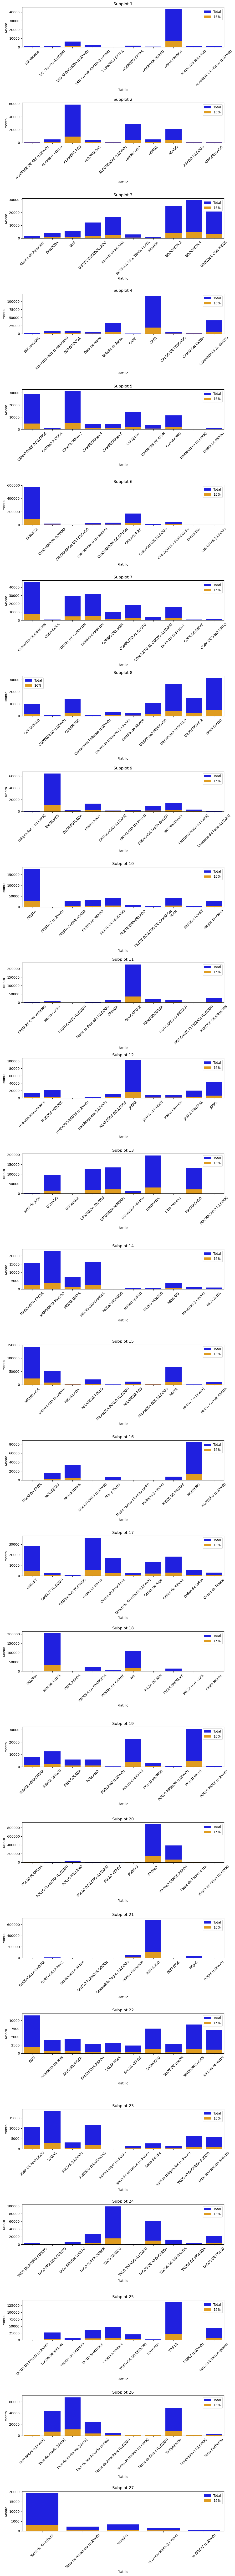

In [20]:
# Dividir el DataFrame en partes más pequeñas para crear múltiples subplots
n = 10  # Número de filas para cada subplot
num_subplots = -(-len(ventas_por_platillo) // n)  # Redondeo hacia arriba de la división entera

# Crear subplots
fig, axs = plt.subplots(nrows=num_subplots, ncols=1, figsize=(10, 4*num_subplots))

# Iterar sobre las partes del DataFrame
for i, (inicio, fin) in enumerate([(x*n, min((x+1)*n, len(ventas_por_platillo))) for x in range(num_subplots)]):
    df_subset = ventas_por_platillo.iloc[inicio:fin]
    ax = axs[i] if num_subplots > 1 else axs  # Si solo hay un subplot, axs no será iterable
    sns.barplot(data=df_subset, x='Platillo', y='Total', ax=ax, color='blue', label='Total')
    sns.barplot(data=df_subset, x='Platillo', y='dieciseis_por_ciento', ax=ax, color='orange', label='16%')
    ax.set_xlabel('Platillo')
    ax.set_ylabel('Monto')
    ax.set_title(f'Subplot {i+1}')
    ax.legend(title=None)
    ax.tick_params(axis='x', rotation=45)  # Ajustar la rotación de las etiquetas del eje x

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

# Hipotesis 2 - Platillos y dias

In [36]:
ventas_por_dia_y_platillo = ventas.groupby(['Dia', 'Descripcion']).agg({'Cantidad': 'sum'}).reset_index()

In [41]:
# Selecciona los platillos más populares para visualizar
platillos_populares = ventas_por_dia_y_platillo.groupby('Descripcion')['Cantidad'].sum().nlargest(10).index

In [42]:
# Filtra los datos para incluir solo los platillos más populares
ventas_por_dia_y_platillo_top = ventas_por_dia_y_platillo[ventas_por_dia_y_platillo['Descripcion'].isin(platillos_populares)]

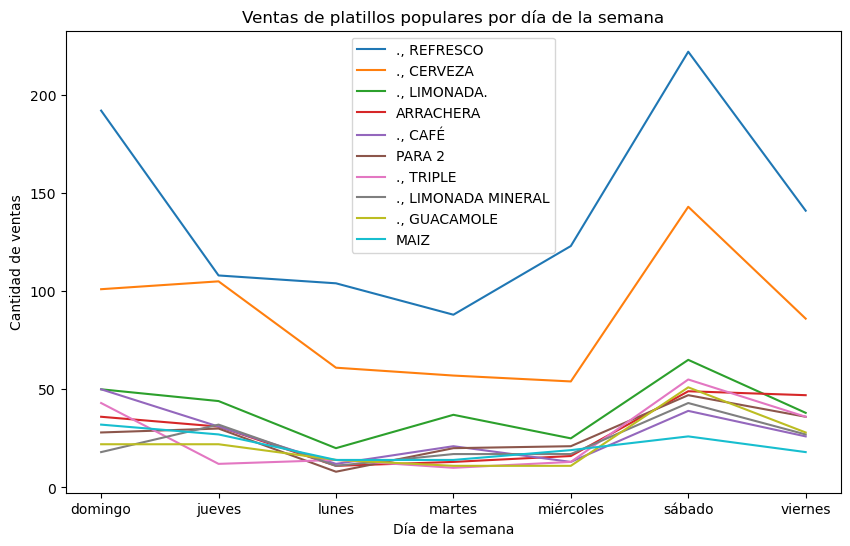

In [43]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
for platillo in platillos_populares:
    datos_platillo = ventas_por_dia_y_platillo_top[ventas_por_dia_y_platillo_top['Descripcion'] == platillo]
    plt.plot(datos_platillo['Dia'], datos_platillo['Cantidad'], label=platillo)

plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de ventas')
plt.title('Ventas de platillos populares por día de la semana')
plt.legend()
plt.show()

# Hipotesis 5 - Promedio de clientes

In [22]:
weekend_data = ventas[ventas['Dia'].isin(['sábado', 'domingo'])]

In [23]:
average_people_weekend = weekend_data.groupby('Dia')['No. Personas'].mean()

In [24]:
print(average_people_weekend)

Dia
domingo    3.688719
sábado     4.060726
Name: No. Personas, dtype: float64


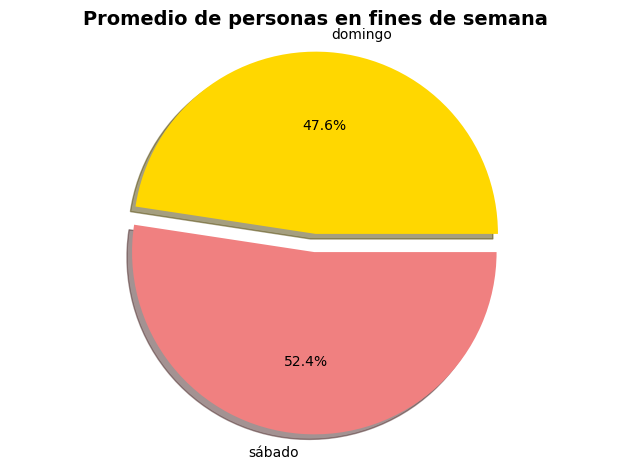

In [25]:
# Creamos la gráfica
# Colores personalizados
colors = ['gold', 'lightcoral']

# Explode para resaltar un sector (opcional)
explode = (0.1, 0)

# Creamos la gráfica de pie
plt.pie(average_people_weekend, labels=average_people_weekend.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.title('Promedio de personas en fines de semana', fontsize=14, fontweight='bold')  # Título personalizado
plt.axis('equal')  # Hace que el gráfico de pie sea un círculo
plt.tight_layout()  # Ajusta el diseño automáticamente para evitar que se superpongan las etiquetas
plt.show()
